In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

In [66]:
myfile = "C:/Users/Admin/OneDrive/Documents/Term 2/BANA 780/Assignment 1/Suicides_Data.csv"
df = pd.read_csv(myfile) # loading dataset from CSV file
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


In [67]:
# Which data types/categories of data are there in the dataset?
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)       int64
gdp_per_capita ($)      int64
generation             object
dtype: object

In [68]:
# What information is available in the given dataset?
print('***************Shape:\n')
print(df.shape)
print('\n***************Columns:\n')
print(df.columns)
print('\n***************Data description:\n')
print(df.describe())

***************Shape:

(27820, 12)

***************Columns:

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

***************Data description:

               year   suicides_no    population  suicides/100k pop  \
count  27820.000000  27820.000000  2.782000e+04       27820.000000   
mean    2001.258375    242.574407  1.844794e+06          12.816097   
std        8.469055    902.047917  3.911779e+06          18.961511   
min     1985.000000      0.000000  2.780000e+02           0.000000   
25%     1995.000000      3.000000  9.749850e+04           0.920000   
50%     2002.000000     25.000000  4.301500e+05           5.990000   
75%     2008.000000    131.000000  1.486143e+06          16.620000   
max     2016.000000  22338.000000  4.380521e+07         224.970000   

       HDI for year   gdp_for_year ($)   gdp_per_capita 

In [69]:
# How many unique values are there in each variable?
print(df.nunique())

country                 101
year                     32
sex                       2
age                       6
suicides_no            2084
population            25564
suicides/100k pop      5298
country-year           2321
HDI for year            305
 gdp_for_year ($)      2321
gdp_per_capita ($)     2233
generation                6
dtype: int64


In [70]:
# Are there missing values in dataset?
df.isnull().sum()  # Finding null values for each column

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [71]:
percent_missing = df['HDI for year'].isnull().sum() * 100 / len(df['HDI for year']) # Computing % of values missing for HDI for year column
percent_missing

69.9352983465133

In [72]:
df = df.drop(['HDI for year'],axis=1) # Dropping HDI for year column
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,2156624900,796,Boomers


<AxesSubplot:>

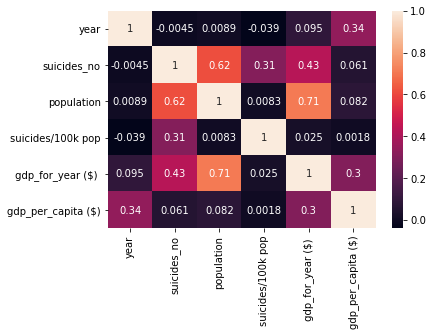

In [73]:
# What is the correlation between the variables?
cor = df.corr() # finding correlation
sns.heatmap(cor,xticklabels = cor.columns,yticklabels = cor.columns,annot = True) # visualizing

<AxesSubplot:xlabel='suicides/100k pop', ylabel='Count'>

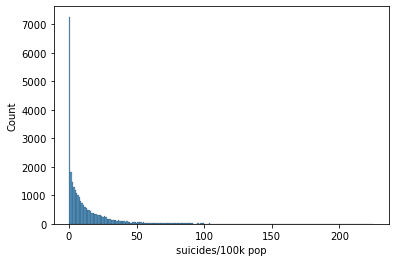

In [74]:
# Is suicides/100k population normally distributed?
sns.histplot(data=df,x='suicides/100k pop')

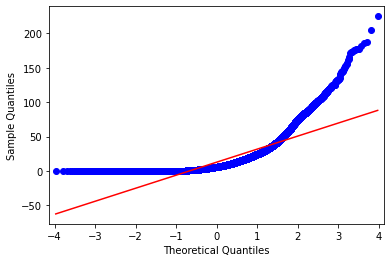

In [75]:
qqplot(df['suicides/100k pop'], line='s')
pyplot.show()

<AxesSubplot:xlabel='suicides/100k pop'>

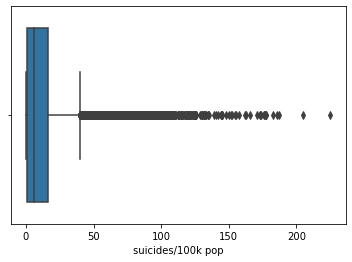

In [76]:
sns.boxplot(x=df['suicides/100k pop'])

In [78]:
# Finding mean, median, and mode for suicides/100k pop column
print("mean: ",df['suicides/100k pop'].mean())
print("median: ",df['suicides/100k pop'].median())
print("mode: ",df.mode()['suicides/100k pop'][0])

mean:  12.816097411933894
median:  5.99
mode:  0.0


In [79]:
# Which countries have the highest average suicides/100k population?
countryAvgSuicide = df.groupby(['country'])['suicides/100k pop'].mean().sort_values(ascending=False) # Finding avg suicides/100k pop for each country
topCountries = countryAvgSuicide[:5] # Getting top 5 countries
topCountries

country
Lithuania             40.415573
Sri Lanka             35.295152
Russian Federation    34.892377
Hungary               32.761516
Belarus               31.075913
Name: suicides/100k pop, dtype: float64

Text(0, 0.5, 'Avg suicides/100k population')

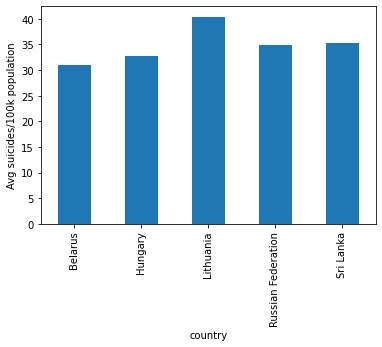

In [80]:
topCountriesData = df[df.country.isin(topCountries.index)] 
topCountriesData.groupby(['country'])['suicides/100k pop'].mean().plot(kind ='bar') # Visualizing using bar plot
plt.ylabel("Avg suicides/100k population")

year
1995    15.662671
1996    15.305422
1997    14.954361
1998    14.926920
1999    14.532038
1994    14.073272
2000    13.941328
1993    13.833705
2002    13.786550
2001    13.519138
1992    13.498564
1991    13.438880
2016    13.421188
2003    13.205019
1989    12.879071
1990    12.862956
1988    12.709405
2004    12.481944
2005    12.068442
2007    12.025339
2006    11.927461
2008    11.907686
1985    11.826198
1987    11.644213
1986    11.423333
2012    11.421718
2009    11.400787
2010    11.215900
2013    11.107958
2015    11.094073
2011    11.015349
2014    11.011464
Name: suicides/100k pop, dtype: float64


Text(0, 0.5, 'Avg suicides/100k population')

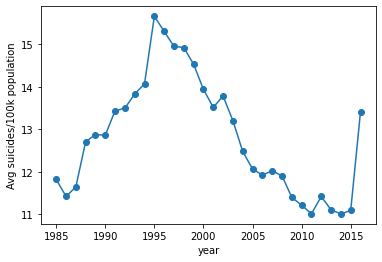

In [81]:
# What is the trend of suicides/100k population over the years?

print(df.groupby(['year'])['suicides/100k pop'].mean().sort_values(ascending=False)) # Finding avg suicides/100k pop for each year
df.groupby(['year'])['suicides/100k pop'].mean().plot(marker='o') # Plotting
plt.ylabel("Avg suicides/100k population")

Text(0, 0.5, 'Avg GDP per Capita ($)')

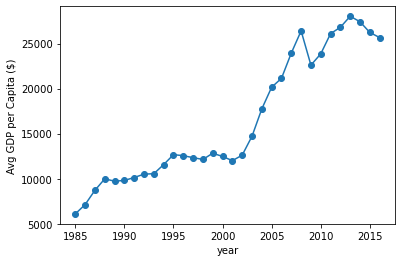

In [82]:
df.groupby(['year'])['gdp_per_capita ($)'].mean().plot(marker='o') # Finding avg gdp_per_capita ($) for each year and plotting
plt.ylabel("Avg GDP per Capita ($)")

Text(0, 0.5, 'Avg GDP for Year ($)')

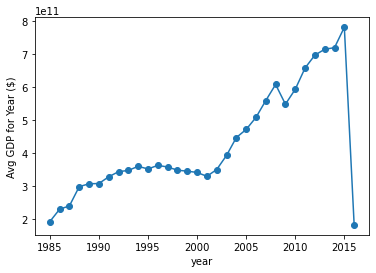

In [83]:
df.groupby(['year'])[' gdp_for_year ($) '].mean().plot(marker='o') # Finding avg gdp_for_year ($) for each year and plotting
plt.ylabel("Avg GDP for Year ($)")

Text(0, 0.5, 'Avg Population')

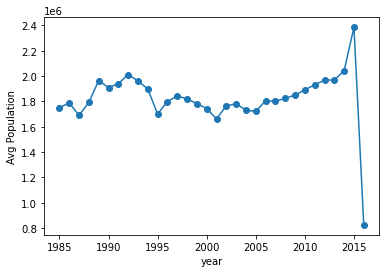

In [84]:
df.groupby(['year'])['population'].mean().plot(marker='o') # Finding avg gpopulation for each year and plotting
plt.ylabel("Avg Population")

generation
G.I. Generation    23.946378
Silent             18.418848
Boomers            14.742094
Generation X       10.556874
Millenials          5.383597
Generation Z        0.642299
Name: suicides/100k pop, dtype: float64


<AxesSubplot:ylabel='suicides/100k pop'>

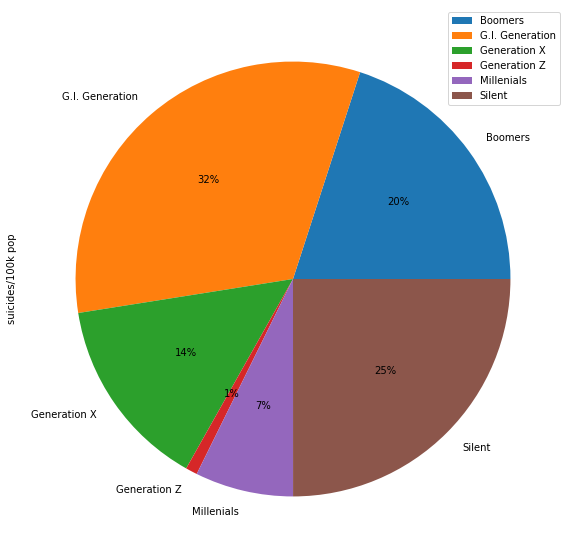

In [85]:
# What patterns are seen in the generation variable?
print(df.groupby(['generation'])['suicides/100k pop'].mean().sort_values(ascending=False)) # Finding avg suicides/100k pop for each generation
df.groupby(['generation']).mean().plot(kind='pie', y='suicides/100k pop',autopct='%1.0f%%',figsize=(10, 10)) # Plotting pie-chart

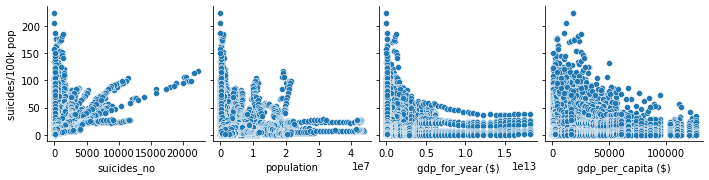

In [86]:
# How do other numerical variables have relation with suicides/100k population?
dfPlot = df[['suicides/100k pop','suicides_no','population',' gdp_for_year ($) ','gdp_per_capita ($)']]

for i in range(1,len(dfPlot.columns),4):
    
    sns.pairplot(data=dfPlot,
                x_vars=dfPlot.columns[i:i+4],      # Plotting pairplots for each variable in dfPlot against suicides/100k pop
                y_vars=['suicides/100k pop'])
    
   
plt.show()

sex
female     5.392866
male      20.239329
Name: suicides/100k pop, dtype: float64


<AxesSubplot:xlabel='sex', ylabel='suicides/100k pop'>

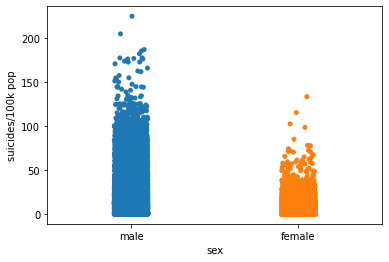

In [87]:
# What pattern is observed in sex?
print(df.groupby(['sex'])['suicides/100k pop'].mean()) # Finding avg suicides/100k pop for each sex
sns.stripplot(data=df,x='sex',y='suicides/100k pop') # Plotting stripplot

<AxesSubplot:xlabel='year', ylabel='suicides_no'>

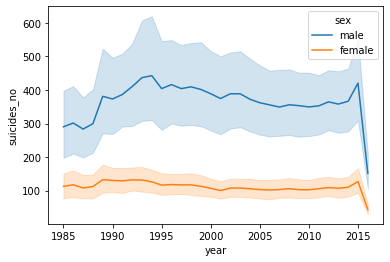

In [88]:
sns.lineplot(data=df, x="year", y="suicides_no",hue="sex") # Plotting time-series plot for each sex

<Figure size 576x576 with 0 Axes>

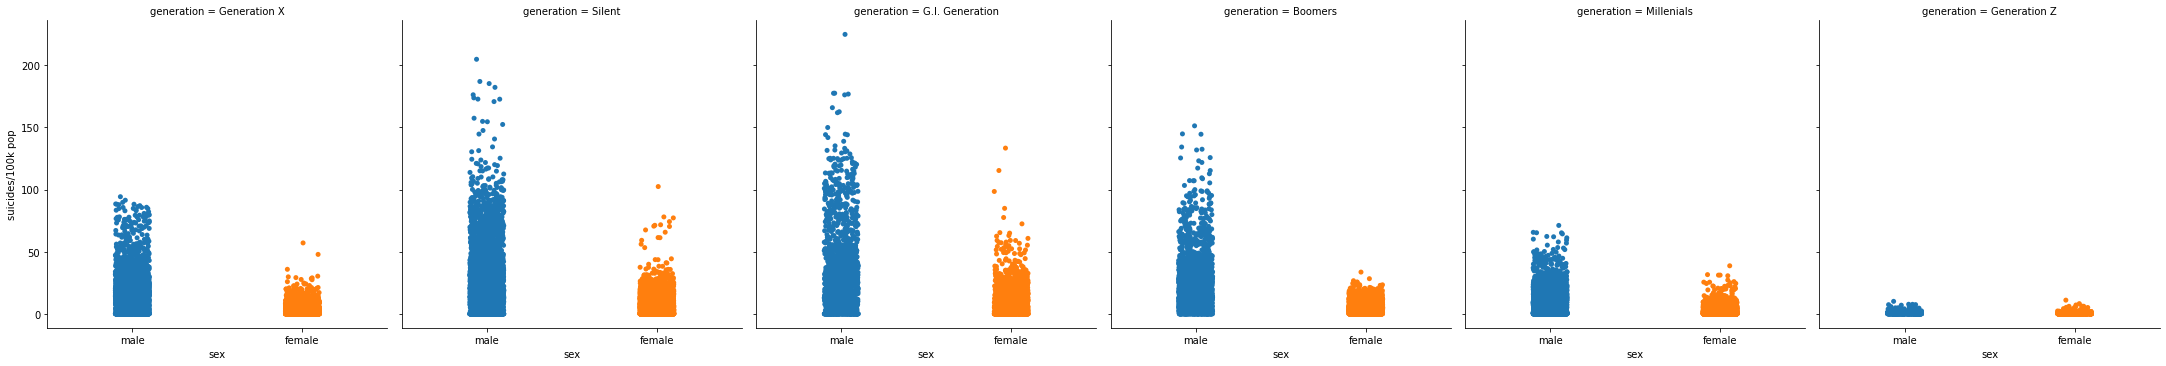

In [89]:
# Is the pattern observed in sex consistent across all the generations?
plt.figure(figsize=(8, 8))
sns.catplot(data=df,x='sex',y='suicides/100k pop',col='generation')

In [90]:
# Which country-year has the highest average suicides/100k population?
countryYear = df.groupby(['country-year'])['suicides/100k pop'].mean().sort_values(ascending=False) # Finding avg suicides/100k pop for each country-year
countryYear[0:5]

country-year
Lithuania1995    53.275000
Lithuania1996    49.634167
Hungary1991      47.916667
Lithuania2000    47.650000
Hungary1992      47.521667
Name: suicides/100k pop, dtype: float64

Text(0, 0.5, 'Avg suicides/100k pop')

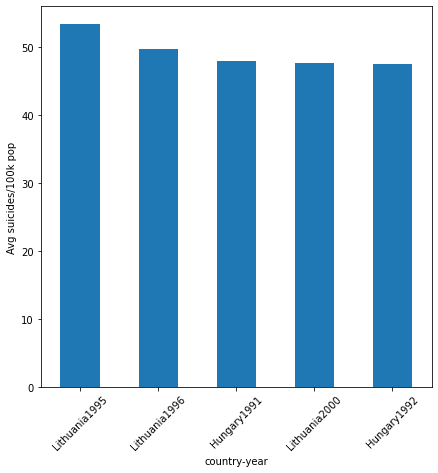

In [91]:
plt.figure(figsize=(7, 7))
countryYear[0:5].plot.bar(x='lab', y='val', rot=45)
plt.ylabel("Avg suicides/100k pop")

year
1999    256119
2002    256095
2003    256079
2000    255832
2001    250652
1998    249591
1996    246725
1995    243544
2009    243487
2004    240861
1997    240745
2010    238702
2011    236484
2008    235447
2005    234375
2007    233408
2006    233361
1994    232063
2012    230160
2013    223199
2014    222984
1993    221565
1992    211473
2015    203640
1991    198020
1990    193361
1989    160244
1987    126842
1988    121026
1986    120670
1985    116063
2016     15603
Name: suicides_no, dtype: int64


Text(0, 0.5, 'Number of Suicides')

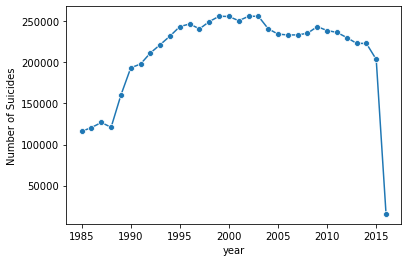

In [92]:
# Which year has the most number of suicides?
year = df.groupby(['year'])['suicides_no'].sum().sort_values(ascending=False) # Finding number of suicides for each year
print(year)

sns.lineplot(x =year.index , y = year.values,marker='o',
             data = year)
plt.ylabel("Number of Suicides")

Countries with most suicides:
country
Russian Federation    1209742
United States         1034013
Japan                  806902
France                 329127
Ukraine                319950
Germany                291262
Republic of Korea      261730
Brazil                 226613
Poland                 139098
United Kingdom         136805
Name: suicides_no, dtype: int64


Text(0, 0.5, 'Number of Suicides')

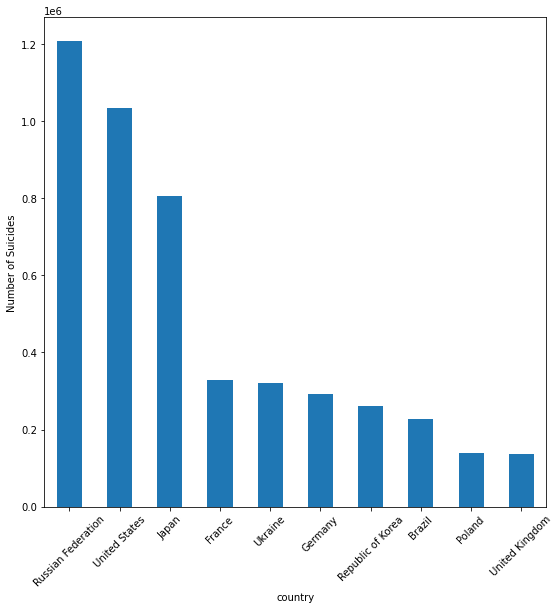

In [93]:
# Which countries have the highest and least number of suicides?
highestNumbers = df.groupby(['country'])['suicides_no'].sum().sort_values(ascending=False) # Finding number of suicides for each country
print("Countries with most suicides:")
print(highestNumbers[:10])

plt.figure(figsize=(9, 9))
highestNumbers[:10].plot.bar(x='lab', y='val', rot=45) # Plotting top 10
plt.ylabel("Number of Suicides")

Countries with least suicides:
country
Dominica                  0
Saint Kitts and Nevis     0
San Marino                4
Antigua and Barbuda      11
Maldives                 20
Macau                    27
Oman                     33
Grenada                  38
Cabo Verde               42
Kiribati                 53
Name: suicides_no, dtype: int64


Text(0, 0.5, 'Number of Suicides')

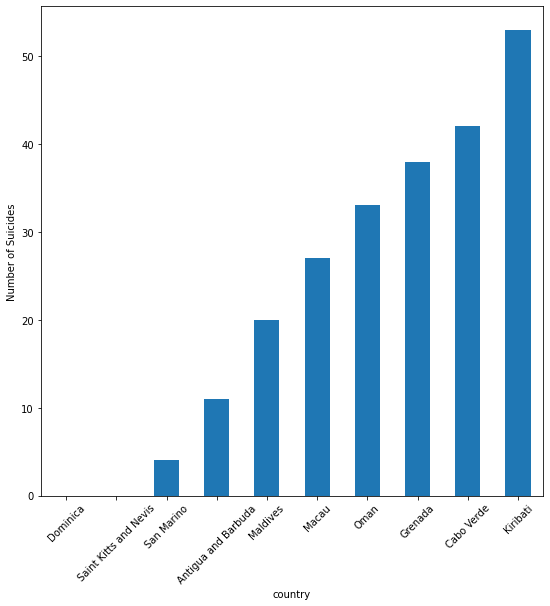

In [94]:
print("Countries with least suicides:")
print(highestNumbers[-1:len(highestNumbers)-11:-1])
plt.figure(figsize=(9, 9))
highestNumbers[-1:len(highestNumbers)-11:-1].plot.bar(x='lab', y='val', rot=45) # Plotting bottom 10
plt.ylabel("Number of Suicides")